## Log likelihood ratio update
Here we show how to simulate a LLR update model along with a thresholding decision criteria. Accuracy and mean time to a decision are also computed and we lastly show that there is an intermediate value of the decision threshold that leads to the best reward rate (accuracy per time).

In [2]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

To start, we will randomly select a true underlying state ($H^+$ or $H^-$) at random, use this to generate a mean ($+1$ or $-1$) of the normal distribution that will represent observations. Evidence will then be accumulated until a decision threshold is reached, after which the decision and whether it is right or not will be printed.

In [52]:
H = np.round(rnd.uniform()-0.5)    # state generation
mu = -1+2*H           # mean of observations
sigma = 2             # standard deviation of observations
h = 3                 # LLR decision threshold

y=np.zeros(100)
k = 0

while np.abs(y[k])<h:
    k+=1
    x = np.random.normal(mu, sigma, 1)
    y[k] = y[k-1]+2*np.abs(mu)*x/sigma/sigma

y = y[0:k+1]
d = np.sign(y[k])
s = np.sign(mu)

print('decision is ' + str(d))
print('state is ' + str(s))
if d==s:
    print('decision is correct')
else:
    print('decision is wrong')
    

decision is -1.0
state is -1.0
decision is correct


Text(0, 0.5, 'y')

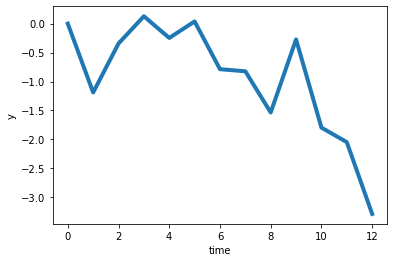

In [53]:
plt.plot(range(k+1),y,linewidth=4.0)
plt.xlabel('time')         # label for x-axis
plt.ylabel('y')      # label for y-axis

Now let us run such a simulation 1000 times and estimate the accuracy and mean time to a decision for a fixed threshold.

In [56]:
Nsim = 1000
acc = 0
Tmean = 0

for k in range(Nsim):
    H = np.round(rnd.uniform()-0.5)    # state generation
    mu = -1+2*H           # mean of observations
    sigma = 2             # standard deviation of observations
    h = 2                 # LLR decision threshold

    y=0
    k=0

    while np.abs(y)<h:
        k+=1
        x = np.random.normal(mu, sigma, 1)
        y = y+2*np.abs(mu)*x/sigma/sigma

    d = np.sign(y)
    s = np.sign(mu)
    
    if d==s:
        acc+=1/Nsim
        
    Tmean+=k/Nsim

print('estimated accuracy is ' + str(acc))
print('compare to theory which is ' + str(1/(1+np.exp(-h))))
print('mean time to a decision is ' + str(Tmean))

estimated accuracy is 0.9300000000000007
compare to theory which is 0.8807970779778823
mean time to a decision is 4.695999999999949


The accuracy in simulations ends up a bit higher because the LLR usually overshoots the threshold.

Now let us repeat this process across a sequence of thresholds to see what gives the best reward rate. We will compute the reward rate as
$$
RR = \frac{Acc}{\bar{T}+\tau},
$$
where $\tau$ accounts for the time to deploy a decision and the time between decisions.

[Text(0.5, 41.0, 'h'), Text(1115.3176470588237, 0.5, 'RR')]

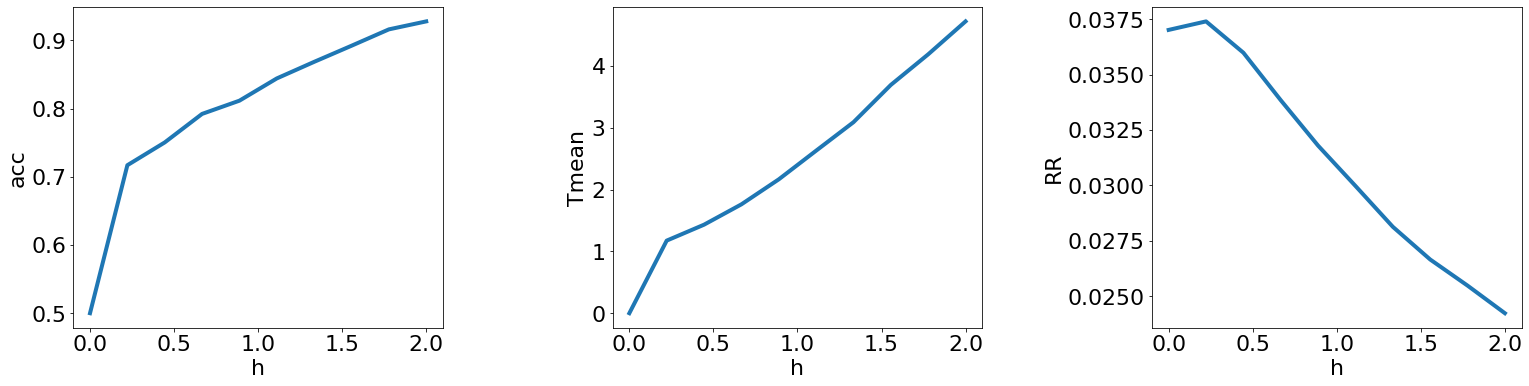

In [68]:
Nsim = 10000
hs = np.linspace(0,2,10)
accs = np.zeros(10)
Tmeans = np.zeros(10)
tau = 10      # gap in time between decisions

for l in range(10):
    h = hs[l]

    for k in range(Nsim):
        H = np.round(rnd.uniform()-0.5)    # state generation
        mu = -1+2*H           # mean of observations
        sigma = 2             # standard deviation of observations

        y=0
        k=0

        while np.abs(y)<h:
            k+=1
            x = np.random.normal(mu, sigma, 1)
            y = y+2*np.abs(mu)*x/sigma/sigma

        d = np.sign(y)
        s = np.sign(mu)
    
        accs[l]+=(1+d*s)/2/Nsim 
        Tmeans[l]+=k/Nsim
        
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
fig.tight_layout(pad=5.0)
axs[0].plot(hs,accs,linewidth=4.0)   # plotting the likelihood fnction
axs[0].set(xlabel='h', ylabel='acc')

axs[1].plot(hs,Tmeans,linewidth=4.0)   # plotting the likelihood fnction
axs[1].set(xlabel='h', ylabel='Tmean')

RR = accs/(Tmeans+tau)
axs[2].plot(hs,RRs,linewidth=4.0)   # plotting the likelihood fnction
axs[2].set(xlabel='h', ylabel='RR')

We see the accuracy and mean time to a decision go up with the threshold, and there is a small threshold where the RR is maximized.